In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [6]:
df = pd.read_csv("/Users/levinschily/Desktop/IRONHACK/Week5/Day1/amz_uk_price_prediction_dataset.csv")
df.head()

uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers

In [8]:
# PART I

# Business Question: What are the most popular product categories on Amazon UK,
# and how do they compare in terms of listing frequency?

In [9]:
frequency_table = df["category"].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [10]:
# The top 5 categories are in order: Sports & Outdoors, Beauty, Handmade Clothing Shoes & Accessioares, Bath & Body, Birthday Gifts

/var/folders/v5/qlyry0nx7f1_bbwxwy9t92sw0000gn/T/ipykernel_25710/3237576271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3")


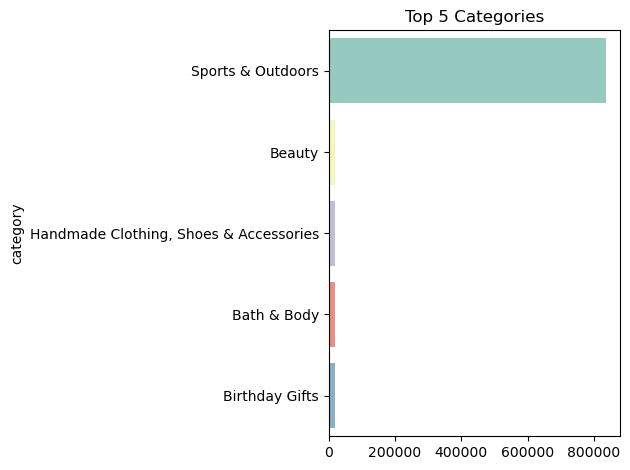

In [11]:
frequency_table = df["category"].value_counts().head(5)

ax = sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3")
plt.title("Top 5 Categories")
plt.tight_layout()
plt.show()

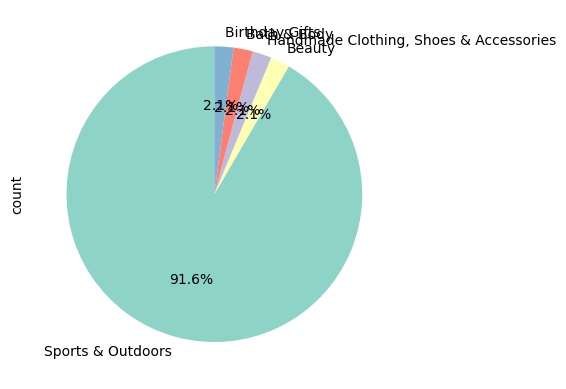

In [12]:
df['category'].value_counts().head(5).plot.pie(autopct='%.1f%%', startangle=90, colors=sns.color_palette("Set3"));
plt.show()

In [13]:
# PART II

# Business Question: How are products priced on Amazon UK, and are there specific price points or 
# ranges that are more common?

In [14]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [15]:
# Average point is 89. most common is 9.99.variance_price = df['SalePrice'].var()


In [16]:
std_dev_price = df['price'].std()
variance_price = df['price'].var()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price

variance_price, std_dev_price, min_price, max_price, range_price#

(119445.4853225653, 345.6088617535223, 0.0, 100000.0, 100000.0)

In [21]:
# Despite the range being 100,000, the std dev is only 345. That means most prices are normal with a few extremely high.

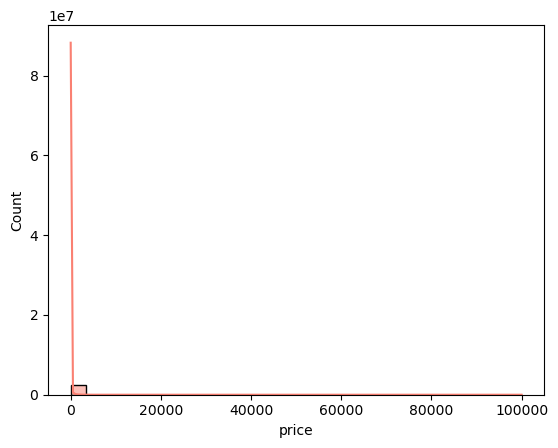

In [29]:
fig, axes = plt.subplots()
sns.histplot(df['price'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()

In [30]:
# There is an extreme value at 0, makeing the other values invisible on the plot.
# SOlution: remove 0 and price over 5000

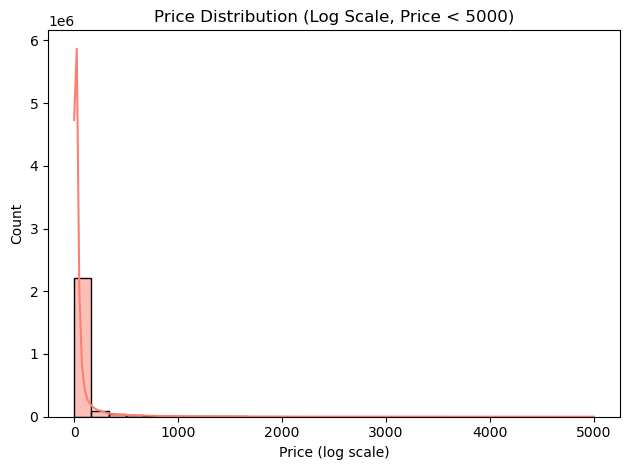

In [31]:

# Filter to remove extreme outliers (keep only reasonable prices)
filtered_df = df[(df['price'] > 0) & (df['price'] < 5000)]

# Plot with log-scaled x-axis
fig, axes = plt.subplots()
sns.histplot(filtered_df['price'], kde=True, bins=30, color="salmon", ax=axes)
plt.title("Price Distribution (Log Scale, Price < 5000)")
plt.xlabel("Price (log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [32]:
# most products fall into the very low - low hundreds in price

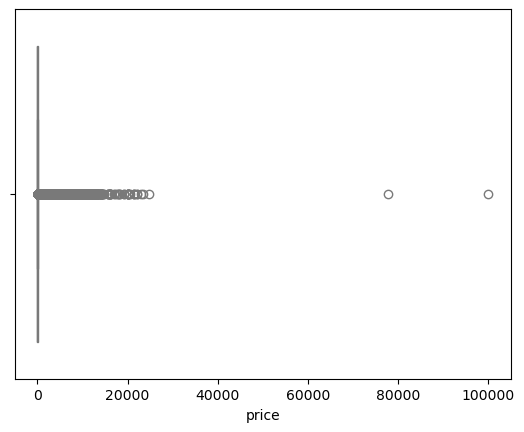

In [35]:
sns.boxplot(x = df['price'], color="lightblue");
plt.show()

In [36]:
# Yes there are products. Maimum reaching 100,000

In [37]:
# Part III
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [38]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]

mean_price, median_price, mode_price

(2.152836472966065, 0.0, 0.0)

In [39]:
# the median and mode are 0. Maybe missing, invalid, or not reviewed. mean of 2 suggests higher but less frequent ratings.


In [42]:
std_dev_price = df['stars'].std()
variance_price = df['stars'].var()
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price

std_dev_price, variance_price, range_price

(2.1948653785054697, 4.81743402976196, 5.0)

In [43]:
# Customer ratings are not consistent. they vary widely.

In [51]:
print(df["stars"].skew())
print(df["stars"].kurt())

0.08120735761080985
-1.9260061280432985


In [ ]:
# The distribution is flatter than normal â€” more ratings are concentrated near the center, with fewer outliers.

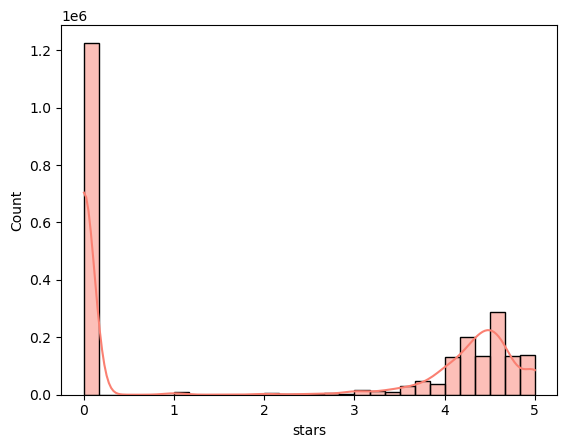

In [53]:
fig, axes = plt.subplots()
sns.histplot(df['stars'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()

In [ ]:
# rating of 0 is most common. also the kur and skew calculations gave misleading insights